# 01- Ramdom Variables

In [1]:
# Dependencies

# Standard Dependencies
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from statistics import median
from scipy import signal
from scipy.special import factorial
import scipy.stats as stats
from scipy.stats import sem, binom, lognorm, poisson, bernoulli, spearmanr
from scipy.fftpack import fft, fftshift

# Scikit-learn for Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Seed for reproducability
seed = 12345
np.random.seed(seed)


# Read in csv of Toy Dataset
# We will use this dataset throughout the tutorial
df = pd.read_csv('../data/toy_dataset.csv')

- [Discrete and Continuous Variables](#2)
  - PMF (Probability Mass Function)
  - PDF (Probability Density Function)
  - CDF (Cumulative Distribution Function)
- [Distributions](#3)
  - Uniform Distribution
  - Normal Distribution
  - Binomial Distribution
  - Poisson Distribution
  - Log-normal Distribution
- [Summary Statistics and Moments](#4)

## Discrete and Continuous Variables <a id="2"></a>

A discrete variable is a variable that can only take on a "countable" number of values. If you can count a set of items, then it’s a discrete variable. An example of a discrete variable is the outcome of a dice. It can only have 1 of 6 different possible outcomes and is therefore discrete. A discrete random variable can have an infinite number of values. For example, the whole set of natural numbers (1,2,3,etc.) is countable and therefore discrete. 

A continuous variable takes on an "uncountable" number of values. An example of a continuous variable is length. Length can be measured to an arbitrary degree and is therefore continuous.

In statistics we represent a distribution of discrete variables with PMF's (Probability Mass Functions) and CDF's (Cumulative Distribution Functions). We represent distributions of continuous variables with PDF's (Probability Density Functions) and CDF's. 

The PMF defines the probability of all possible values x of the random variable. A PDF is the same but for continuous values.
The CDF represents the probability that the random variable X will have an outcome less or equal to the value x. The name CDF is used for both discrete and continuous distributions.

The functions that describe PMF's, PDF's and CDF's can be quite daunting at first, but their visual counterpart often looks quite intuitive.

### PMF (Probability Mass Function)

Here we visualize a PMF of a binomial distribution. You can see that the possible values are all integers. For example, no values are between 50 and 51. 

The PMF of a binomial distribution in function form:

$$P(X=x) = p^x\left(\frac{N}{n}\right)(1-p)^(N-x) $$

See the "[Distributions](#3)" sections for more information on binomial distributions.

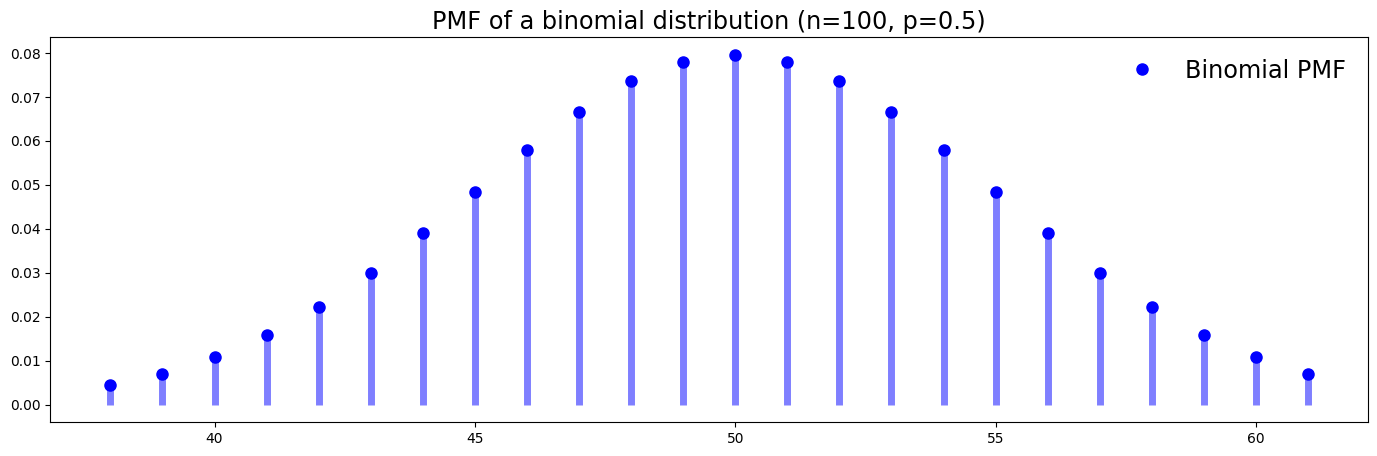

In [2]:
# PMF Visualization
n = 100
p = 0.5

fig, ax = plt.subplots(1, 1, figsize=(17,5))
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='Binomial PMF')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
#ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen PMF')
ax.legend(loc='best', frameon=False, fontsize='xx-large')
plt.title('PMF of a binomial distribution (n=100, p=0.5)', fontsize='xx-large')
plt.show()

### PDF (Probability Density Functions)

The PDF is the same as a PMF, but continuous. It can be said that the distribution has an infinite number of possible values. Here we visualize a simple normal distribution with a mean of 0 and standard deviation of 1.

PDF of a normal distribution in formula form:

![](https://www.mhnederlof.nl/images/normalpdf.jpg)

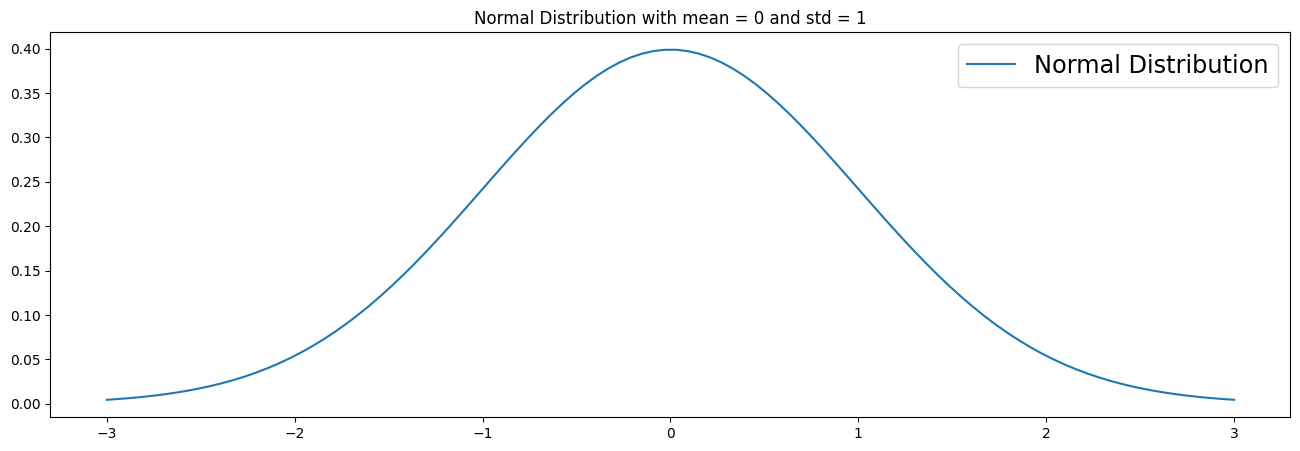

In [15]:
# Plot normal distribution
mu = 0
variance = 1
sigma = sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(16,5))
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution')
plt.title('Normal Distribution with mean = 0 and std = 1')
plt.legend(fontsize='xx-large')
plt.show()

### CDF (Cumulative Distribution Function)

The CDF maps the probability that a random variable X will take a value of less than or equal to a value x (P(X ≤  x)). CDF's can be discrete or continuous. In this section we visualize the continuous case. You can see in the plot that the CDF accumulates all probabilities and is therefore bounded between 0 ≤ x ≤ 1.

The CDF of a normal distribution as a formula:

$$\frac{1}{2}\left[1+erf\left(\frac{x-mu}{\sigma\sqrt(2)}\right) \right] $$

*Note: erf means "[error function](https://en.wikipedia.org/wiki/Error_function)".*

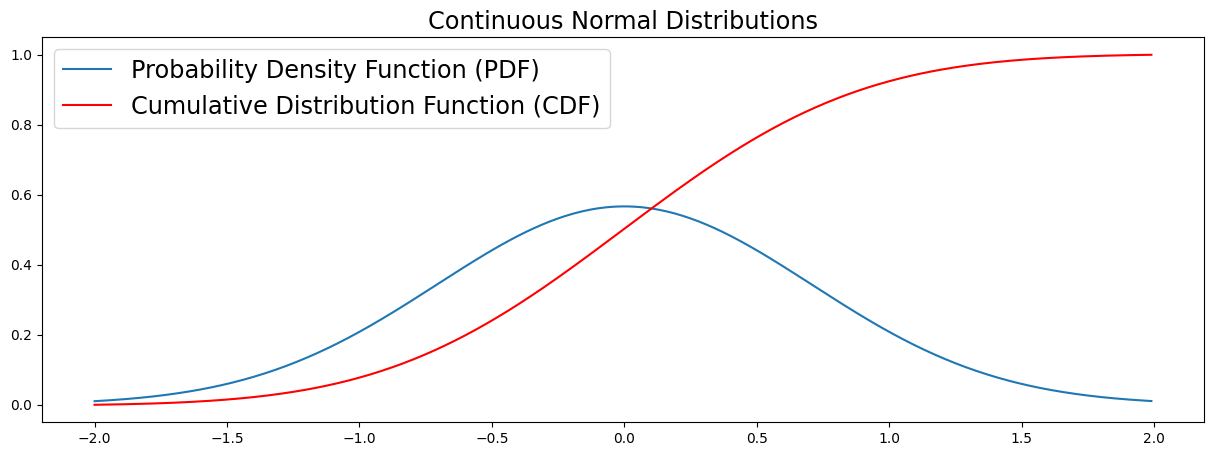

In [4]:
# Data
X  = np.arange(-2, 2, 0.01)
Y  = exp(-X ** 2)

# Normalize data
Y = Y / (0.01 * Y).sum()

# Plot the PDF and CDF
plt.figure(figsize=(15,5))
plt.title('Continuous Normal Distributions', fontsize='xx-large')
plot(X, Y, label='Probability Density Function (PDF)')
plot(X, np.cumsum(Y * 0.01), 'r', label='Cumulative Distribution Function (CDF)')
plt.legend(fontsize='xx-large')
plt.show()

## Distributions <a id="3"></a>

A Probability distribution tells us something about the likelihood of each value of the random variable.

A random variable X is a function that maps events to real numbers.

The visualizations in this section are of discrete distributions. Many of these distributions can however also be continuous.

### Uniform Distribution

A Uniform distribution is pretty straightforward. Every value has an equal change of occuring. Therefore, the distribution consists of random values with no patterns in them. In this example we generate random floating numbers between 0 and 1.

The PDF of a Uniform Distribution:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/648692e002b720347c6c981aeec2a8cca7f4182f)

CDF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eeeeb233753cfe775b24e3fec2f371ee8cdc63a6)

In [5]:
# Uniform distribution (between 0 and 1)
uniform_dist = np.random.random(1000)
uniform_df = pd.DataFrame({'value' : uniform_dist})
uniform_dist = pd.Series(uniform_dist)

Text(0.5, 1.0, 'Scatterplot of a Random/Uniform Distribution')

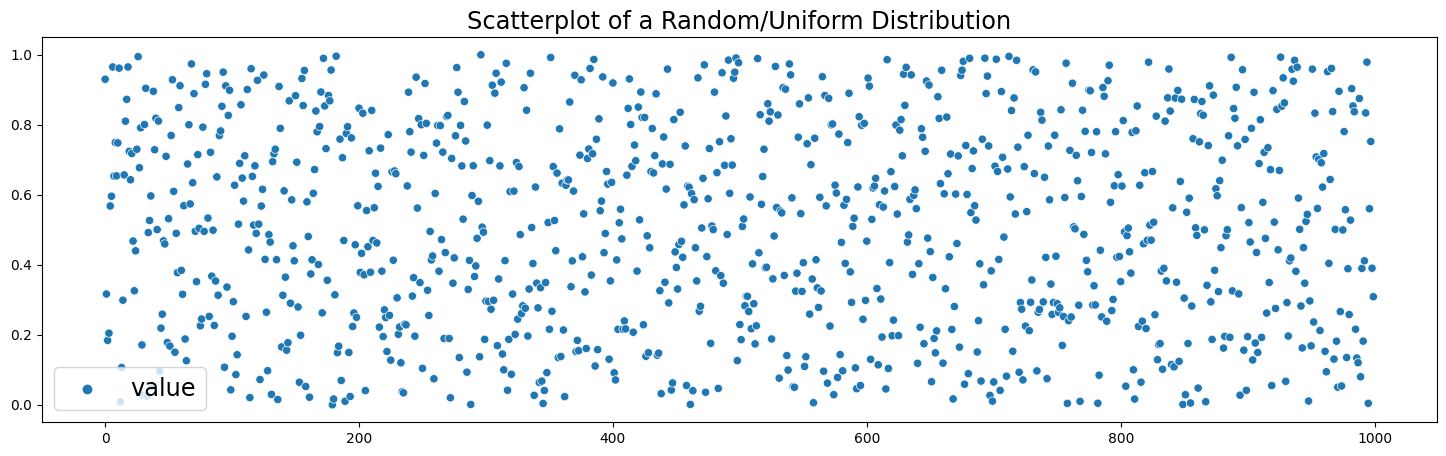

In [6]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=uniform_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Random/Uniform Distribution', fontsize='xx-large')

/home/ubuntu/Documents/Projects/msci_data/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Random/Uniform distribution')

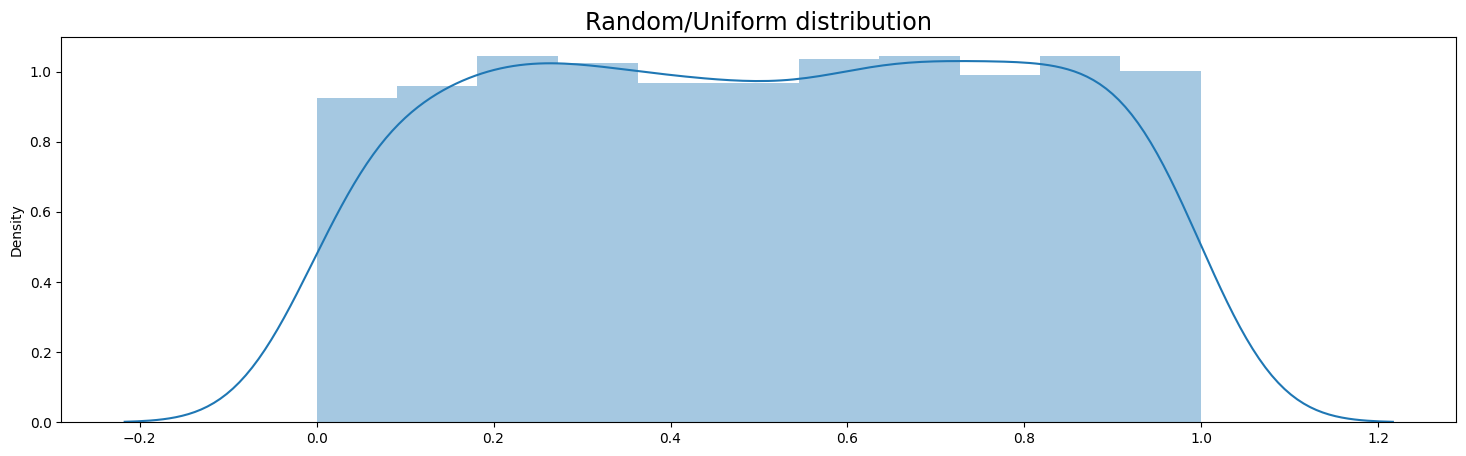

In [7]:
plt.figure(figsize=(18,5))
sns.distplot(uniform_df)
plt.title('Random/Uniform distribution', fontsize='xx-large')

### Normal Distribution

A normal distribution (also called Gaussian or Bell Curve) is very common and convenient. This is mainly because of the [Central Limit Theorem (CLT)](https://en.wikipedia.org/wiki/Central_limit_theorem), which states that as the amount independent random samples (like multiple coin flips) goes to infinity the distribution of the sample mean tends towards a normal distribution.

PDF of a normal distribution:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2ce7e315b02666699e0cd8ea5fb1a3e0c287cd9d)

CDF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/187f33664b79492eedf4406c66d67f9fe5f524ea)


In [8]:
# Generate Normal Distribution
normal_dist = np.random.randn(10000)
normal_df = pd.DataFrame({'value' : normal_dist})
# Create a Pandas Series for easy sample function
normal_dist = pd.Series(normal_dist)

normal_dist2 = np.random.randn(10000)
normal_df2 = pd.DataFrame({'value' : normal_dist2})
# Create a Pandas Series for easy sample function
normal_dist2 = pd.Series(normal_dist)

normal_df_total = pd.DataFrame({'value1' : normal_dist, 
                                'value2' : normal_dist2})

Text(0.5, 1.0, 'Scatterplot of a Normal Distribution')

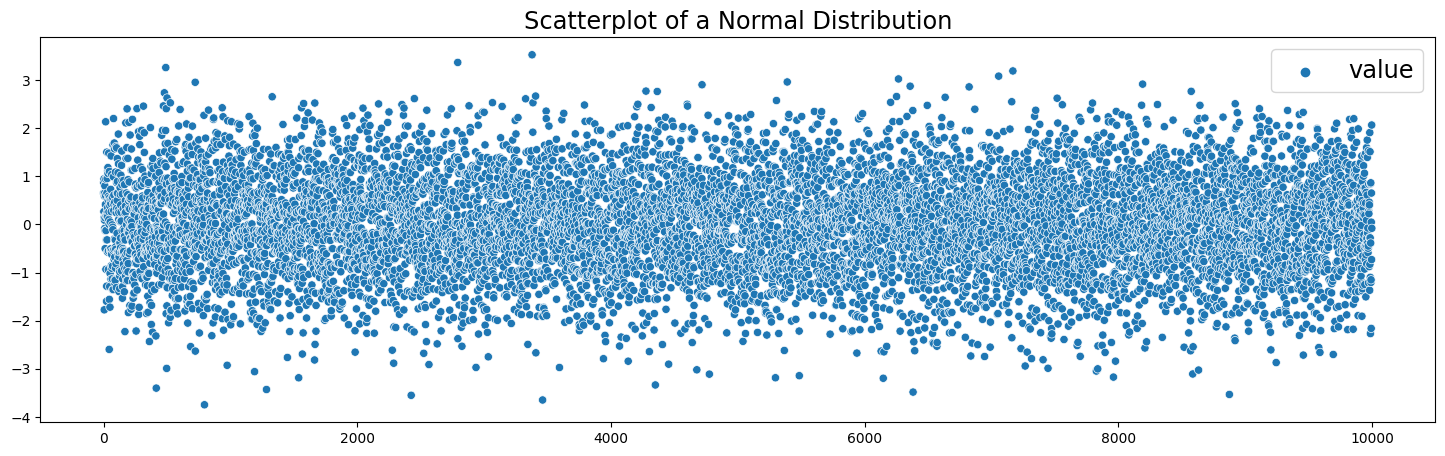

In [9]:
# Scatterplot
plt.figure(figsize=(18,5))
sns.scatterplot(data=normal_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Normal Distribution', fontsize='xx-large')

/home/ubuntu/Documents/Projects/msci_data/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normal distribution (n=1000)')

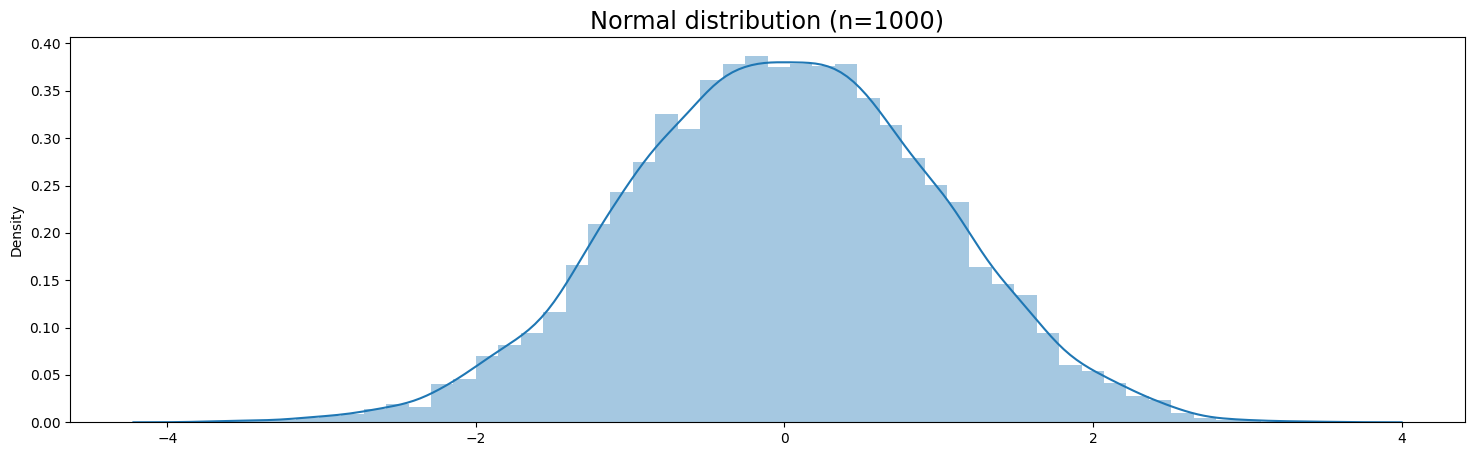

In [10]:
# Normal Distribution as a Bell Curve
plt.figure(figsize=(18,5))
sns.distplot(normal_df)
plt.title('Normal distribution (n=1000)', fontsize='xx-large')

### Binomial Distribution

A Binomial Distribution has a countable number of outcomes and is therefore discrete.

Binomial distributions must meet the following three criteria:

1. The number of observations or trials is fixed. In other words, you can only figure out the probability of something happening if you do it a certain number of times.
2. Each observation or trial is independent. In other words, none of your trials have an effect on the probability of the next trial.
3. The probability of success is exactly the same from one trial to another.

An intuitive explanation of a binomial distribution is flipping a coin 10 times. If we have a fair coin our chance of getting heads (p) is 0.50. Now we throw the coin 10 times and count how many times it comes up heads. In most situations we will get heads 5 times, but there is also a change that we get heads 9 times. The PMF of a binomial distribution will give these probabilities if we say N = 10 and p = 0.5. We say that the x for heads is 1 and 0 for tails.

PMF:

$$P(X=x) = p^x\left(\frac{N}{n}\right)(1-p)^{N-x} $$


CDF:

$$P(X\leq x) = \sum_{i=0}^x p^i\left(\frac{N}{i}\right)(1-p)^{N-i} $$


A **Bernoulli Distribution** is a special case of a Binomial Distribution.

All values in a Bernoulli Distribution are either 0 or 1. 

For example, if we take an unfair coin which falls on heads 60 % of the time, we can describe the Bernoulli distribution as follows:

p (change of heads) = 0.6

1 - p (change of tails) = 0.4

heads = 1

tails = 0

Formally, we can describe a Bernoulli distribution with the following PMF (Probability Mass Function):

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/a9207475ab305d280d2958f5c259f996415548e9)


Text(0.5, 1.0, 'Bernoulli Distribution: p = 0.6, n = 1000')

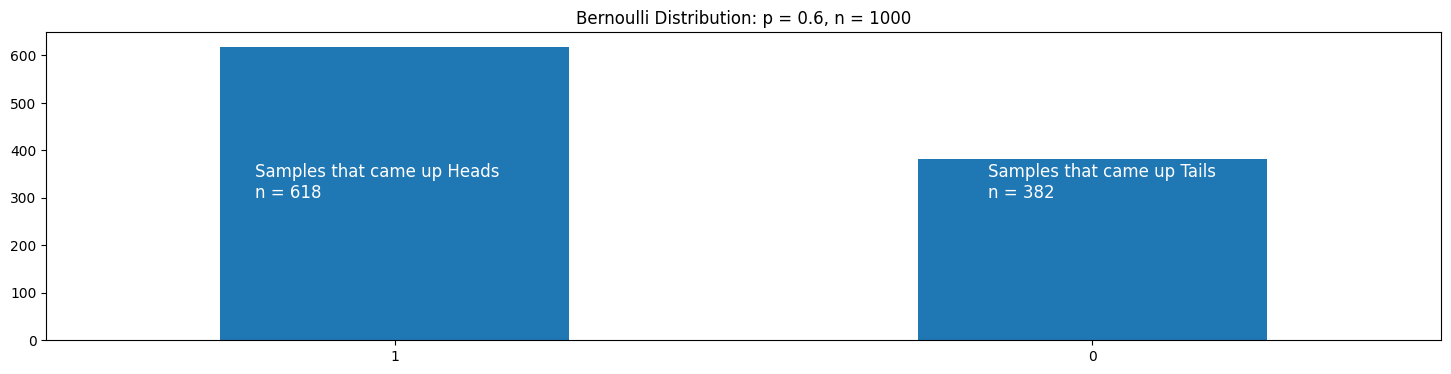

In [11]:
# Change of heads (outcome 1)
p = 0.6

# Create Bernoulli samples
bern_dist = bernoulli.rvs(p, size=1000)
bern_df = pd.DataFrame({'value' : bern_dist})
bern_values = bern_df['value'].value_counts()

# Plot Distribution
plt.figure(figsize=(18,4))
bern_values.plot(kind='bar', rot=0)
plt.annotate(xy=(0.85,300), 
             text='Samples that came up Tails\nn = {}'.format(bern_values[0]), 
             fontsize='large', 
             color='white')
plt.annotate(xy=(-0.2,300), 
             text='Samples that came up Heads\nn = {}'.format(bern_values[1]), 
             fontsize='large', 
             color='white')
plt.title('Bernoulli Distribution: p = 0.6, n = 1000')

### Poisson Distribution

The Poisson distribution is a discrete distribution and is popular for modelling the number of times an event occurs in an interval of time or space. 

It takes a value lambda, which is equal to the mean of the distribution.

PMF: 

![](https://study.com/cimages/multimages/16/poisson1a.jpg)

![](https://study.com/cimages/multimages/16/poisson1a.jpg)

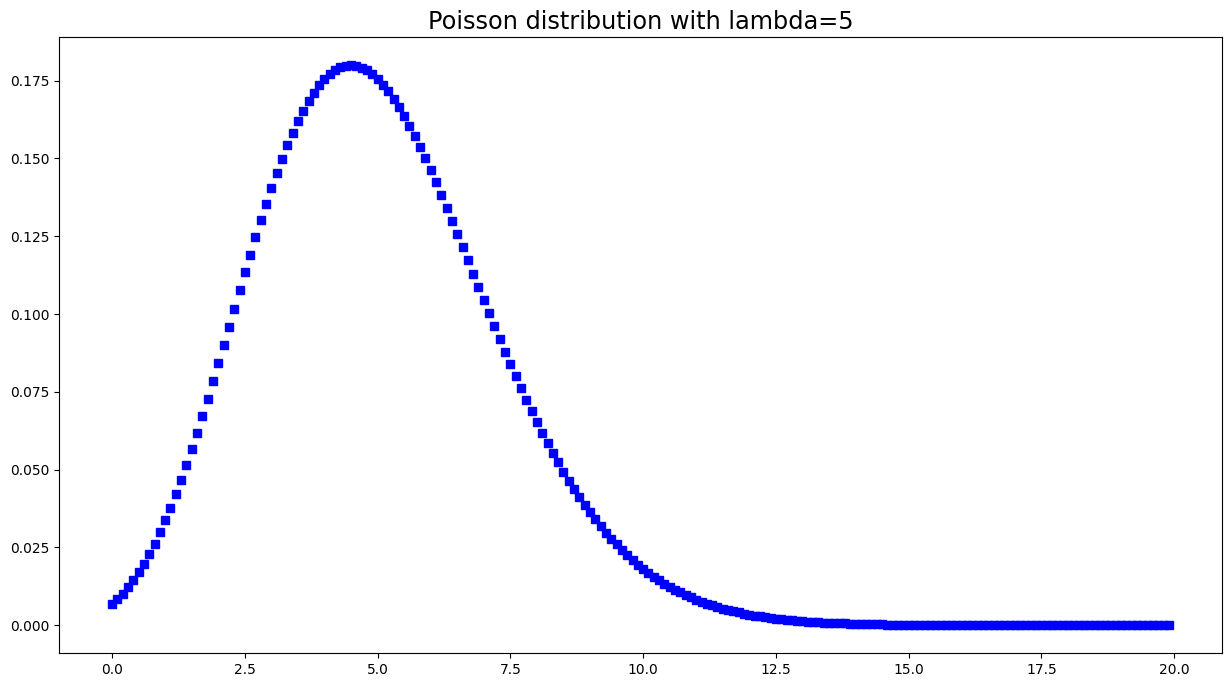

In [12]:
x = np.arange(0, 20, 0.1)
y = np.exp(-5)*np.power(5, x)/factorial(x)

plt.figure(figsize=(15,8))
plt.title('Poisson distribution with lambda=5', fontsize='xx-large')
plt.plot(x, y, 'bs')
plt.show()

### Log-Normal Distribution

A log-normal distribution is continuous. The main characteristic of a log-normal distribution is that it's logarithm is normally distributed. It is also referred to as Galton's distribution.

PDF: 

![](https://www.mhnederlof.nl/images/lognormaldensity.jpg)

CDF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/29095d9cbd6539833d549c59149b9fc5bd06339b)

Where Phi is the CDF of the standard normal distribution.

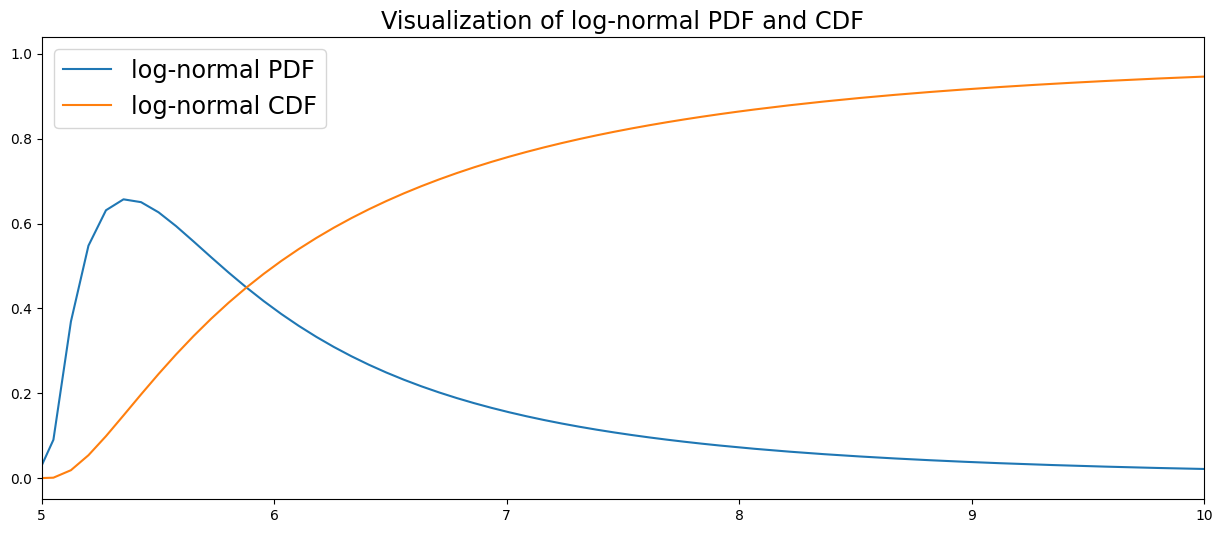

In [13]:
# Specify standard deviation and mean
std = 1
mean = 5

# Create log-normal distribution
dist=lognorm(std,loc=mean)
x=np.linspace(0,15,200)

# Visualize log-normal distribution
plt.figure(figsize=(15,6))
plt.xlim(5, 10)
plt.plot(x,dist.pdf(x), label='log-normal PDF')
plt.plot(x,dist.cdf(x), label='log-normal CDF')
plt.legend(fontsize='xx-large')
plt.title('Visualization of log-normal PDF and CDF', fontsize='xx-large')
plt.show()

## Summary Statistics and Moments <a id="4"></a>

**Mean, Median and Mode** 

Note: The mean is also called the first moment.


![](https://qph.fs.quoracdn.net/main-qimg-29a4925034e075f16e1c743a4b3dda8b)

### Moments

A moment is a quantitative measure that says something about the shape of a distribution. There are central moments and non-central moments. This section is focused on the central moments.

The 0th central moment is the total probability and is always equal to 1.

The 1st moment is the mean (expected value).

The 2nd central moment is the variance.

**Variance** = The average of the squared distance of the mean. Variance is interesting in a mathematical sense, but the standard deviation is often a much better measure of how spread out the distribution is.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_variance.png)

**Standard Deviation** = The square root of the variance

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_std_dev.png)

The 3rd central moment is the skewness.

**Skewness** = A measure that describes the contrast of one tail versus the other tail. For example, if there are more high values in your distribution than low values then your distribution is 'skewed' towards the high values.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_skewness.png)

The 4th central moment is the kurtosis.

**Kurtosis** = A measure of how 'fat' the tails in the distribution are.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_kurtosis.png)

The higher the moment, the harder it is to estimate with samples. Larger samples are required in order to obtain good estimates.

In [14]:
# Summary
print('Summary Statistics for a normal distribution: ')
# Median
medi = median(normal_dist)
print('Median: ', medi)
display(normal_df.describe())

# Standard Deviation
std = sqrt(np.var(normal_dist))

print('The first four calculated moments of a normal distribution: ')
# Mean
mean = normal_dist.mean()
print('Mean: ', mean)

# Variance
var = np.var(normal_dist)
print('Variance: ', var)

# Return unbiased skew normalized by N-1
skew = normal_df['value'].skew()
print('Skewness: ', skew)

# Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis 
# (kurtosis of normal == 0.0) normalized by N-1
kurt = normal_df['value'].kurtosis()
print('Kurtosis: ', kurt)

Summary Statistics for a normal distribution: 
Median:  -0.010146478913623783


,value
count,10000.000000
mean,-0.012836
std,0.998052
min,-3.745356
25%,-0.699103
50%,-0.010146
75%,0.669962
max,3.525865


The first four calculated moments of a normal distribution: 
Mean:  -0.01283644346701061
Variance:  0.9960090077751415
Skewness:  -0.05972347114268668
Kurtosis:  -0.06831807499437392
